# Survey Results (Preliminary)

Progress
- Single select questions - complete
- Multiple selections - pending

In [55]:
# Import dataset
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from wordcloud import WordCloud

import warnings
warnings.simplefilter("ignore")

In [56]:
# Load dataset
responses = pd.read_csv(r"Survey responses (String).csv")
responses = responses.iloc[2:, 17:]

# Pre-processing data

In [57]:
# Change dtype to numeric
responses['2_1'] = pd.to_numeric(responses['2_1'])

# Remove all aged below 18 and above 25
responses = responses.loc[(responses['2_1'] >= 18) & (responses['2_1'] <= 25)]

# Remove all ungendered
responses = responses.loc[(responses['1'] == 'Male') | (responses['1'] == 'Female')]

# Pre-university (15 - 20), University (20 - 25)
responses['2_1'] = responses['2_1'].apply(lambda x: 'Uni' if x >= 20 else 'Pre-Uni')

In [58]:
# Summary of valid responses
print('There are ' + str(responses.shape[0]) + ' valid entries.')

There are 176 valid entries.


# Q3 - Do you use facial care

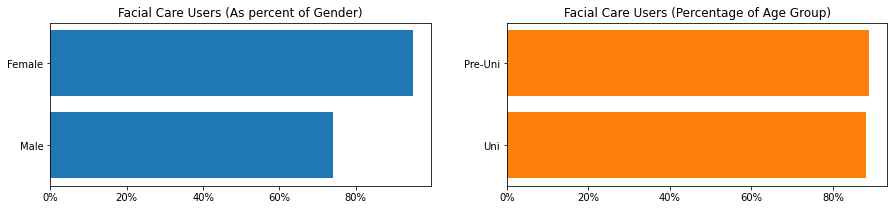

Female Percent: 94.92%
Male Percent: 74.14%
-----
Uni Percent: 88.02%
Pre-Uni Percent: 88.89%


In [59]:
# Gender percentages 
def gender_pct(responses):
    k = responses['1'].value_counts().keys()
    v = responses['1'].value_counts()
    gen_dict = dict(zip(k,v))
    m_num_users = len(responses.loc[(responses['1'] == 'Male') & (responses['3'].str[:1] == 'Y')])
    f_num_users = len(responses.loc[(responses['1'] == 'Female') & (responses['3'].str[:1] == 'Y')])
    m_pct = m_num_users / gen_dict['Male']
    f_pct = f_num_users / gen_dict['Female']
    return m_pct, f_pct

# Age group percentages
def age_pct(responses):
    k = responses['2_1'].value_counts().keys()
    v = responses['2_1'].value_counts()
    uni_dict = dict(zip(k,v))
    u_num_users = len(responses.loc[(responses['2_1'] == 'Uni') & (responses['3'].str[:1] == 'Y')])
    p_num_users = len(responses.loc[(responses['2_1'] == 'Pre-Uni') & (responses['3'].str[:1] == 'Y')])
    u_pct = u_num_users / uni_dict['Uni']
    p_pct = p_num_users / uni_dict['Pre-Uni']
    return u_pct, p_pct


def plot_q3():
    # Function assignments
    m_pct, f_pct = gender_pct(responses)
    u_pct, p_pct = age_pct(responses)

    # Plotting
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15,3))
    ax1.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax2.xaxis.set_major_formatter(mtick.PercentFormatter(1))
    ax1.barh(['Male', 'Female'], [m_pct, f_pct], color = 'tab:blue')
    ax2.barh(['Uni', 'Pre-Uni'], [u_pct, p_pct], color = 'tab:orange')
    ax1.set_title('Facial Care Users (As percent of Gender)')
    ax2.set_title('Facial Care Users (Percentage of Age Group)')
    plt.show()

    # Metrics
    print('Female Percent: ' + str(round(f_pct*100, 2)) + '%')
    print('Male Percent: ' + str(round(m_pct*100, 2)) +'%')
    print('-----')
    print('Uni Percent: ' + str(round(u_pct*100, 2)) + '%')
    print('Pre-Uni Percent: ' + str(round(p_pct*100, 2)) +'%')

plot_q3()


# Q5 & 6 - Importance of exfoliators

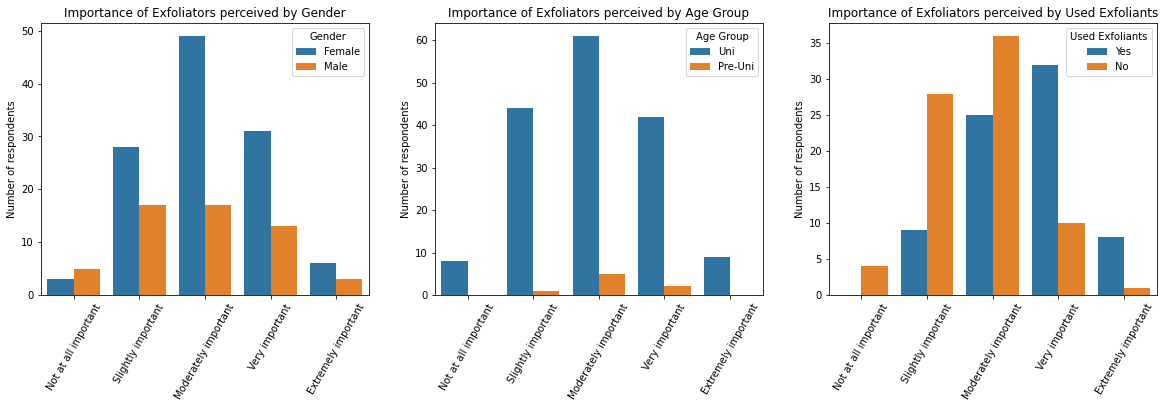

In [60]:
def q5_plot():

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5))
    ordering = ['Not at all important', 'Slightly important', 'Moderately important', 'Very important', 'Extremely important' ]

    #  Importance based on gender (1)
    sns.countplot(responses['5'], order = ordering, hue = responses['1'], ax = ax1)

    # Importance based on age (2)
    sns.countplot(responses['5'], order = ordering, hue = responses['2_1'], ax = ax2)

    # Importance based on exfoliator users (6)
    sns.countplot(responses['5'], order = ordering, hue = responses['6'], ax = ax3)

    axes_, lbls = (ax1, ax2, ax3), ['Gender', 'Age Group', 'Used Exfoliants']

    for i in range(len(axes_)):
        axes_[i].tick_params(axis='x', rotation= 60)
        axes_[i].legend_.set_title(lbls[i])
        axes_[i].set_ylabel('Number of respondents')
        axes_[i].set_xlabel(None)
        axes_[i].set_title('Importance of Exfoliators perceived by '+ lbls[i])

    plt.show()

q5_plot()

# Q8 Benefits of face scrubs

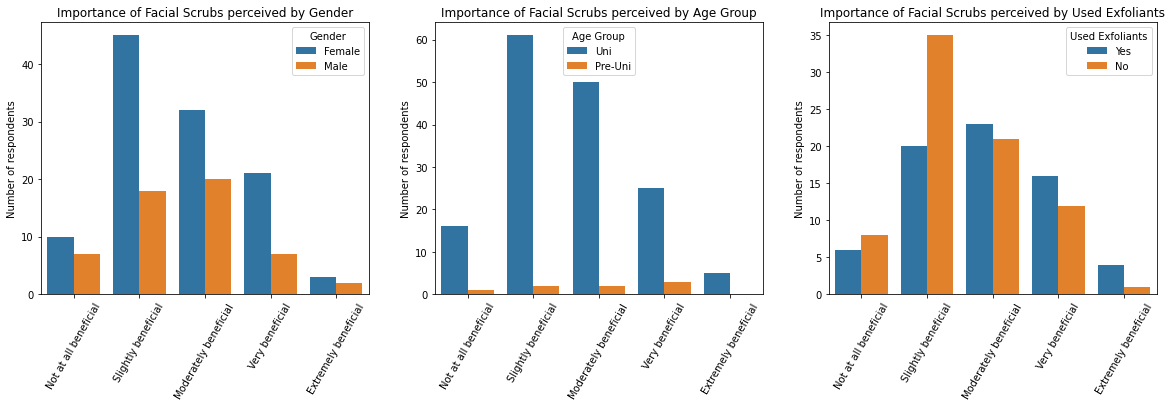

In [61]:
def q8_plot():

    fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (20,5))
    ordering = ['Not at all beneficial', 'Slightly beneficial', 'Moderately beneficial', 'Very beneficial', 'Extremely beneficial' ]

    #  Importance based on gender (1)
    sns.countplot(responses['8'], order = ordering, hue = responses['1'], ax = ax1)

    # Importance based on age (2)
    sns.countplot(responses['8'], order = ordering, hue = responses['2_1'], ax = ax2)

    # Importance based on exfoliator users (6)
    sns.countplot(responses['8'], order = ordering, hue = responses['6'], ax = ax3)

    axes_, lbls = (ax1, ax2, ax3), ['Gender', 'Age Group', 'Used Exfoliants']

    for i in range(len(axes_)):
        axes_[i].tick_params(axis='x', rotation= 60)
        axes_[i].legend_.set_title(lbls[i])
        axes_[i].set_xlabel(None)
        axes_[i].set_ylabel('Number of respondents')
        axes_[i].set_title('Importance of Facial Scrubs perceived by '+ lbls[i])

    plt.show()

q8_plot()

# Q9 - Keywords when thinking of Facial Scrubs

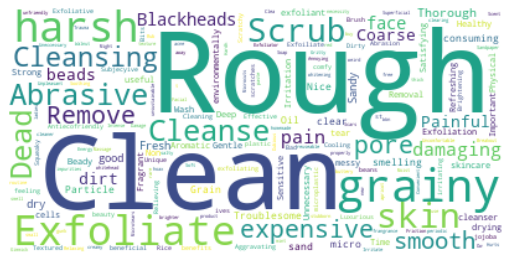

In [62]:
cloud_df = responses[['9_1', '9_2', '9_3']]
cloud_df = pd.melt(cloud_df)
cloud_df = cloud_df.dropna(how = 'any')


def cloud9():
    text = " ".join(i for i in cloud_df.value)
    word_cloud = WordCloud(collocations = False, background_color = 'white').generate(text)
    plt.figure(figsize = (8,8), dpi = 80)
    plt.imshow(word_cloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()

cloud9()

# Q11 - Main reason for use of facial scrubs

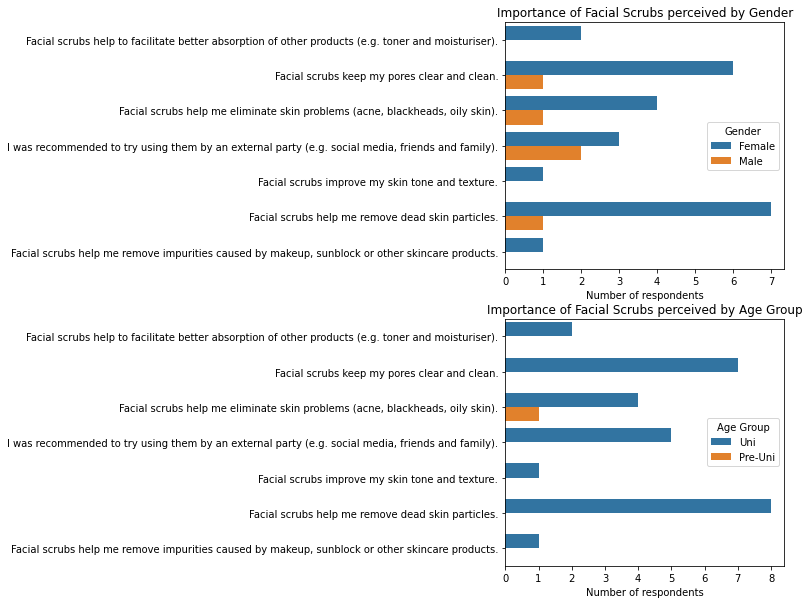

In [67]:
def q11_plot():

    fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5,10))

    #  Importance based on gender (1)
    sns.countplot(y = responses['11a'], hue = responses['1'], ax = ax1)

    # Importance based on age (2)
    sns.countplot(y = responses['11a'], hue = responses['2_1'], ax = ax2)

    # # Importance based on exfoliator users (6)
    # sns.countplot(y = responses['11a'], hue = responses['6'], ax = ax3)

    axes_, lbls = (ax1, ax2), ['Gender', 'Age Group']

    for i in range(len(axes_)):
        axes_[i].legend_.set_title(lbls[i])
        axes_[i].set_ylabel(None)
        axes_[i].set_xlabel('Number of respondents')
        axes_[i].set_title('Importance of Facial Scrubs perceived by '+ lbls[i])

    plt.show()

q11_plot()